# Data Cleaning Notebook

<center>
<img src="https://th.bing.com/th/id/R.582f80df3a837d8e2561b1b11620e11f?rik=2gYUgayWhh4lrQ&pid=ImgRaw&r=0" alt="drawing" width="240"/>
</center>

This notebook focuses on cleaning and preparing the raw data for further analysis.

## Table of Contents
1. [Introduction](#introduction)
2. [Importing Libraries](#Importing-Libraries)
3. [Loading Data](#loading-data)
4. [Data Cleaning](#data-cleaning)
5. [Exporting Cleaned Data](#Exporting-Cleaned-Data) 
6. [Conclusion](#conclusion)

---

## ***Introduction***

- This notebook focuses on cleaning and preparing the raw data for analysis. The dataset used is defined as below:
  
  - **<font color='red'>Dataset description: </font>**
  The Titanic dataset contains information about the passengers of the RMS Titanic, 
  - **<font color='red'>Dataset source</font>:** https://www.kaggle.com/c/titanic/data
  - **<font color='red'>Dataset contents</font>:** This Dataset includes various details about each passenger, such Passenger Class, Sex, Age and survival status, etc.
  - **<font color='red'>Dataset purpose</font>:**  This dataset is commonly used for binary classification tasks to predict whether a passenger survived or not.
---

## Importing Libraries


In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# import __________

## Loading Data

In [107]:
# Loading the raw 'titanic.csv' data into a DataFrame for exploration.
titanic_data = pd.read_csv("../data/titanic.csv")
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Cleaning
---
### Performing cleaning operations such as handling missing values, duplicates, and transforming the data.


In [108]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Handling missing values

In [109]:
# 'True' in a cell refers to the presence of null values 
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

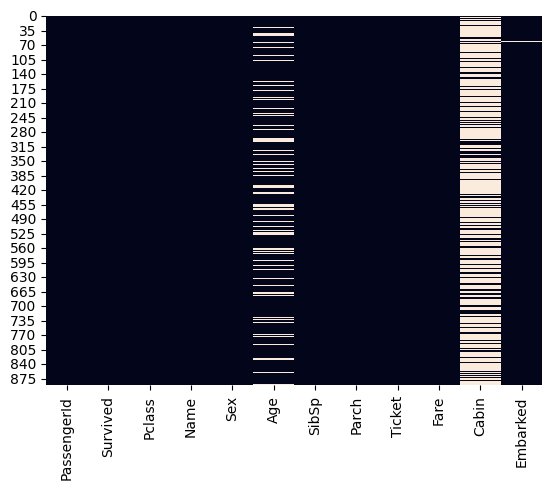

In [110]:
# visual approach to determine missing data
sns.heatmap(titanic_data.isnull(), cbar=False)
# the while lines in 'Sex' and 'Cabin' indicates missing values

In [111]:
PClass_1 = titanic_data[titanic_data['Pclass'] == 1]['Age'].mean() 
PClass_2 = titanic_data[titanic_data['Pclass'] == 2]['Age'].mean()
PClass_3 = titanic_data[titanic_data['Pclass'] == 3]['Age'].mean()

print('Average Age for Class 1 passengers = {}'.format(PClass_1))
print('Average Age for Class 2 passengers = {}'.format(PClass_2))
print('Average Age for Class 3 passengers = {}'.format(PClass_3))

Average Age for Class 1 passengers = 38.233440860215055
Average Age for Class 2 passengers = 29.87763005780347
Average Age for Class 3 passengers = 25.14061971830986


In [112]:
# Imputing age variable using the average age per Class 
def replace_missing_age(columns):
    age = columns[0]
    passenger_class = columns[1]

    if pd.isnull(age):
        if(passenger_class == 1):
            return titanic_data[titanic_data['Pclass'] == 1]['Age'].mean()
        elif(passenger_class == 2):
            return titanic_data[titanic_data['Pclass'] == 2]['Age'].mean()
        elif(passenger_class == 3):
            return titanic_data[titanic_data['Pclass'] == 3]['Age'].mean()
    else:
        return age
    
titanic_data['Age'] = titanic_data[['Age', 'Pclass']].apply(replace_missing_age, axis = 1)
    

C:\Users\Zahrane\AppData\Local\Temp\ipykernel_2040\2327742228.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age = columns[0]
C:\Users\Zahrane\AppData\Local\Temp\ipykernel_2040\2327742228.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  passenger_class = columns[1]


<Axes: >

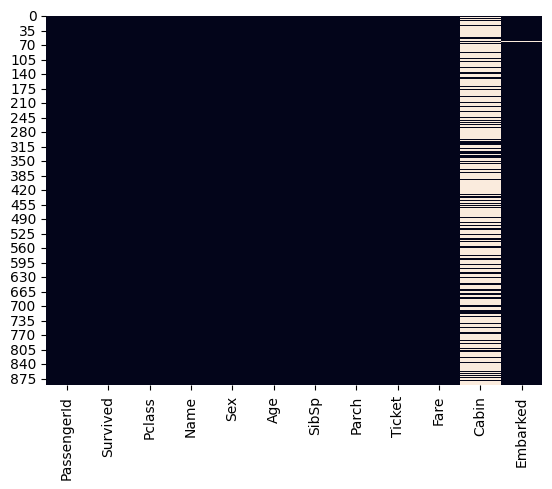

In [113]:
# the heatmap indicates that there is no longer null values in the 'Age' variable
sns.heatmap(titanic_data.isnull(), cbar=False)

### Removing variables with too much missing data

In [114]:
titanic_data.drop('Cabin', axis=1, inplace = True)

In [115]:
# dropping additional columns that contain mussing data
titanic_data.dropna(inplace = True)


### Handling categorical data

In [116]:
pd.get_dummies(titanic_data['Sex'])

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [117]:
pd.get_dummies(titanic_data['Sex'], drop_first = True)

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [118]:
## Creating dummy variable cols for 'Sex' and 'Embarked' variables
sex_data = pd.get_dummies(titanic_data['Sex'], drop_first = True)
embarked_data = pd.get_dummies(titanic_data['Embarked'], drop_first = True)
titanic_data = pd.concat([titanic_data, sex_data, embarked_data], axis = 1)
titanic_data.drop(['Name', 'Ticket', 'Sex', 'Embarked'], axis = 1, inplace = True)

titanic_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.00000,1,0,7.2500,True,False,True
1,2,1,1,38.00000,1,0,71.2833,False,False,False
2,3,1,3,26.00000,0,0,7.9250,False,False,True
3,4,1,1,35.00000,1,0,53.1000,False,False,True
4,5,0,3,35.00000,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.00000,0,0,13.0000,True,False,True
887,888,1,1,19.00000,0,0,30.0000,False,False,True
888,889,0,3,25.14062,1,2,23.4500,False,False,True
889,890,1,1,26.00000,0,0,30.0000,True,False,False


## Exporting Cleaned Data

In [119]:
# Export the cleaned data to a new file for further analysis.
titanic_data.to_csv("../data/titanic_train.csv", index=False)

## Other

In [120]:
# Other shit to be done